In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [9]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: >

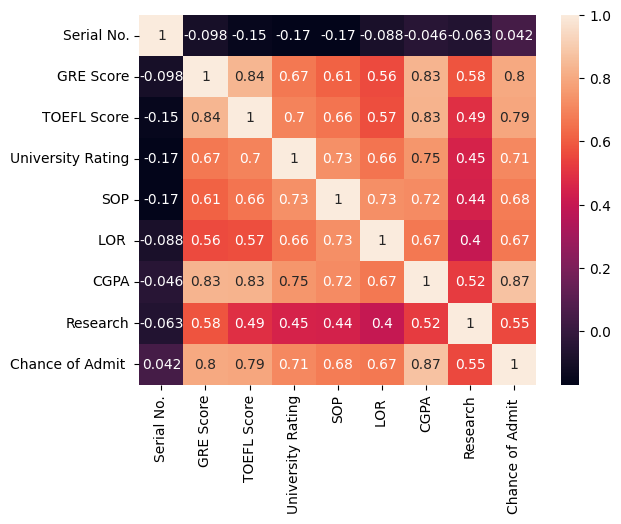

In [4]:
corr_features = df.corr()

sns.heatmap(corr_features, annot=True)

In [10]:
df = df.drop(columns='Serial No.')

In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [17]:
df['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [18]:
x = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
len(x_train[0])

7

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [49]:
model = Sequential()

#vlezen sloj
model.add(Dense(16, input_dim=7, activation='relu', kernel_initializer='normal'))

#hidden layers
model.add(Dropout(0.2, input_shape=(16,))) #gi kratam vrskite i stavam kolku nevroni imame od vlezot
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1, input_shape=(10,)))

#izlezen sloj
model.add(Dense(1, activation='linear')) # 1 nevron - change of admit target variable - output   

#Dropout pravi kratenje na vrskite od ednata do drugata lokacija , dava skrateni vrski od ednata do drugata lokacija 
#input_shape - kolku prethodni nevroni imame = 32 
# rate = 0.2 means 20% of the neurons in this layer will be randomly turned off during each forward pass.

In [50]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309 (1.21 KB)

 Trainable params: 309 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
history = model.fit(x_train, y_train,epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - val_loss: 0.0052
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 - val_loss: 0.0046
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0054
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132 - val_loss: 0.0052
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104 - val_loss: 0.0053
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0138 - val_loss: 0.0059
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - val_loss: 0.0063
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122 - val_loss: 0.0054
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0138 - val_loss: 0.0058
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101 - val_loss: 0.0044
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 - val_lo

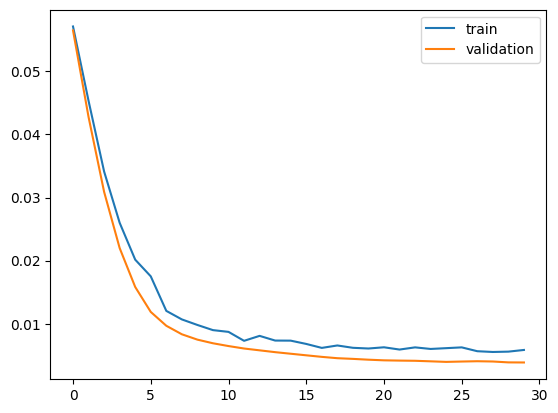

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])

In [57]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [46]:
y_pred = y_pred.round()

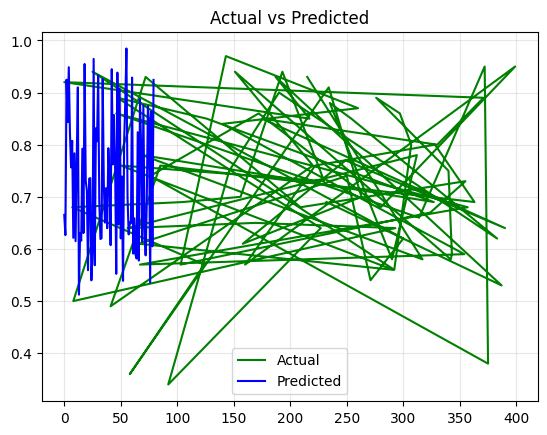

In [59]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7926952647385905
0.047123560935258865
0.0045368641311959446
